In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.shape

(200000, 9)

In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True)

In [8]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [9]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Fare Amount

In [13]:
fare_amt_negative= (df.fare_amount<0).any()

In [17]:
fare_amt_negative=[fare for fare in df.fare_amount if fare <0]

In [22]:
len(fare_amt_negative)

17

In [23]:
fare_amt = [fare for fare in df.fare_amount if fare>=0]

In [24]:
len(fare_amt)

199983

In [29]:
fare_amt_zero= (df.fare_amount == 0).any()

In [38]:
fare_amt_zero=[fare for fare in df.fare_amount if fare ==0]

In [39]:
len(fare_amt_zero)

5

In [44]:
df.fare_amount = [fare if fare >= 0 else 0 for fare in df.fare_amount]

In [45]:
fare_amt = [fare for fare in df.fare_amount if fare==0]
len(fare_amt)

22

In [46]:
df.fare_amount = [df.fare_amount.mean() if fare==0 else fare for fare in df.fare_amount]

In [47]:
fare_amt = [fare for fare in df.fare_amount if fare==0]
len(fare_amt)

0

## Longitude and Latitude Columns

In [24]:
long_lati_cols = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

In [25]:
for col in long_lati_cols:
    df[col] = [round(i,4) for i in df[col]]

In [26]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.9998,40.7384,-73.9995,40.7232,1
1,7.7,2009-07-17 20:04:56 UTC,-73.9944,40.7282,-73.9947,40.7503,1
2,12.9,2009-08-24 21:45:00 UTC,-74.0050,40.7408,-73.9626,40.7726,1
3,5.3,2009-06-26 08:22:21 UTC,-73.9761,40.7908,-73.9653,40.8033,3
4,16.0,2014-08-28 17:47:00 UTC,-73.9250,40.7441,-73.9731,40.7612,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.9870,40.7394,-73.9865,40.7403,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.9847,40.7368,-74.0067,40.7396,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.9860,40.7565,-73.8590,40.6926,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.9971,40.7255,-73.9832,40.6954,1


## Distance Conversion

In [48]:
from math import *

def distance_formula(longitude1,latitude1,longitude2,latitude2):
    travel_dist = []

    for pos in range (len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1

        a=sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2

        c = 2 * asin(sqrt(a)) * 6371
        travel_dist.append(c)

    return travel_dist
        

In [51]:
 df['dist_travel_km'] = distance_formula(df.pickup_longitude.to_numpy(),df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())

In [52]:
df['dist_travel_km']

0          1.683323
1          2.457590
2          5.036377
3          1.661683
4          4.475450
            ...    
199995     0.112210
199996     1.875050
199997    12.850319
199998     3.539715
199999     5.417783
Name: dist_travel_km, Length: 200000, dtype: float64

## Date Time Conversions

In [30]:
from datetime import datetime

In [31]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

In [32]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.9998,40.7384,-73.9995,40.7232,1,1.690352
1,7.7,2009-07-17 20:04:56+00:00,-73.9944,40.7282,-73.9947,40.7503,1,2.457538
2,12.9,2009-08-24 21:45:00+00:00,-74.0050,40.7408,-73.9626,40.7726,1,5.025685
3,5.3,2009-06-26 08:22:21+00:00,-73.9761,40.7908,-73.9653,40.8033,3,1.660850
4,16.0,2014-08-28 17:47:00+00:00,-73.9250,40.7441,-73.9731,40.7612,5,4.475642
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.9870,40.7394,-73.9865,40.7403,1,0.108580
199996,7.5,2014-03-14 01:09:00+00:00,-73.9847,40.7368,-74.0067,40.7396,1,1.879518
199997,30.9,2009-06-29 00:42:00+00:00,-73.9860,40.7565,-73.8590,40.6926,2,12.846166
199998,14.5,2015-05-20 14:56:25+00:00,-73.9971,40.7255,-73.9832,40.6954,1,3.546100


In [33]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format="%m/%d/%Y, %H:%M:%S")


In [34]:
df.pickup_datetime

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 199999, dtype: datetime64[ns, UTC]

In [35]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_travel_km                   float64
dtype: object

In [36]:

df=df.assign(
    hour=df.pickup_datetime.dt.hour,
    day=df.pickup_datetime.dt.day,
    month=df.pickup_datetime.dt.month,
    year=df.pickup_datetime.dt.year,
    dayofweek=df.pickup_datetime.dt.dayofweek
)

In [37]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.9998,40.7384,-73.9995,40.7232,1,1.690352,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.9944,40.7282,-73.9947,40.7503,1,2.457538,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.0050,40.7408,-73.9626,40.7726,1,5.025685,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.9761,40.7908,-73.9653,40.8033,3,1.660850,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.9250,40.7441,-73.9731,40.7612,5,4.475642,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.9870,40.7394,-73.9865,40.7403,1,0.108580,10,28,10,2012,6
199996,7.5,2014-03-14 01:09:00+00:00,-73.9847,40.7368,-74.0067,40.7396,1,1.879518,1,14,3,2014,4
199997,30.9,2009-06-29 00:42:00+00:00,-73.9860,40.7565,-73.8590,40.6926,2,12.846166,0,29,6,2009,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.9971,40.7255,-73.9832,40.6954,1,3.546100,14,20,5,2015,2


In [38]:
df.drop("pickup_datetime",axis=1,inplace=True)

In [39]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km,hour,day,month,year,dayofweek
0,7.5,-73.9998,40.7384,-73.9995,40.7232,1,1.690352,19,7,5,2015,3
1,7.7,-73.9944,40.7282,-73.9947,40.7503,1,2.457538,20,17,7,2009,4
2,12.9,-74.0050,40.7408,-73.9626,40.7726,1,5.025685,21,24,8,2009,0
3,5.3,-73.9761,40.7908,-73.9653,40.8033,3,1.660850,8,26,6,2009,4
4,16.0,-73.9250,40.7441,-73.9731,40.7612,5,4.475642,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.9870,40.7394,-73.9865,40.7403,1,0.108580,10,28,10,2012,6
199996,7.5,-73.9847,40.7368,-74.0067,40.7396,1,1.879518,1,14,3,2014,4
199997,30.9,-73.9860,40.7565,-73.8590,40.6926,2,12.846166,0,29,6,2009,0
199998,14.5,-73.9971,40.7255,-73.9832,40.6954,1,3.546100,14,20,5,2015,2


## Outliers

<Axes: xlabel='fare_amount'>

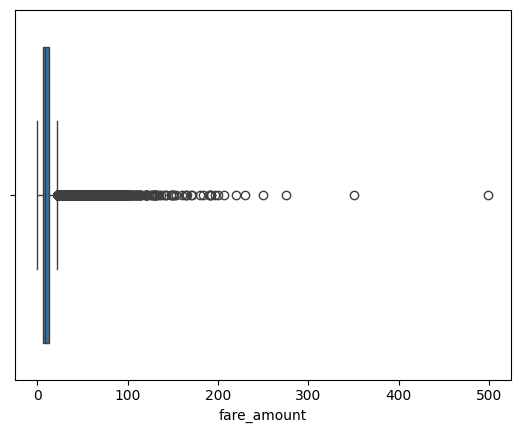

In [74]:
sns.boxplot(x=df['fare_amount'])

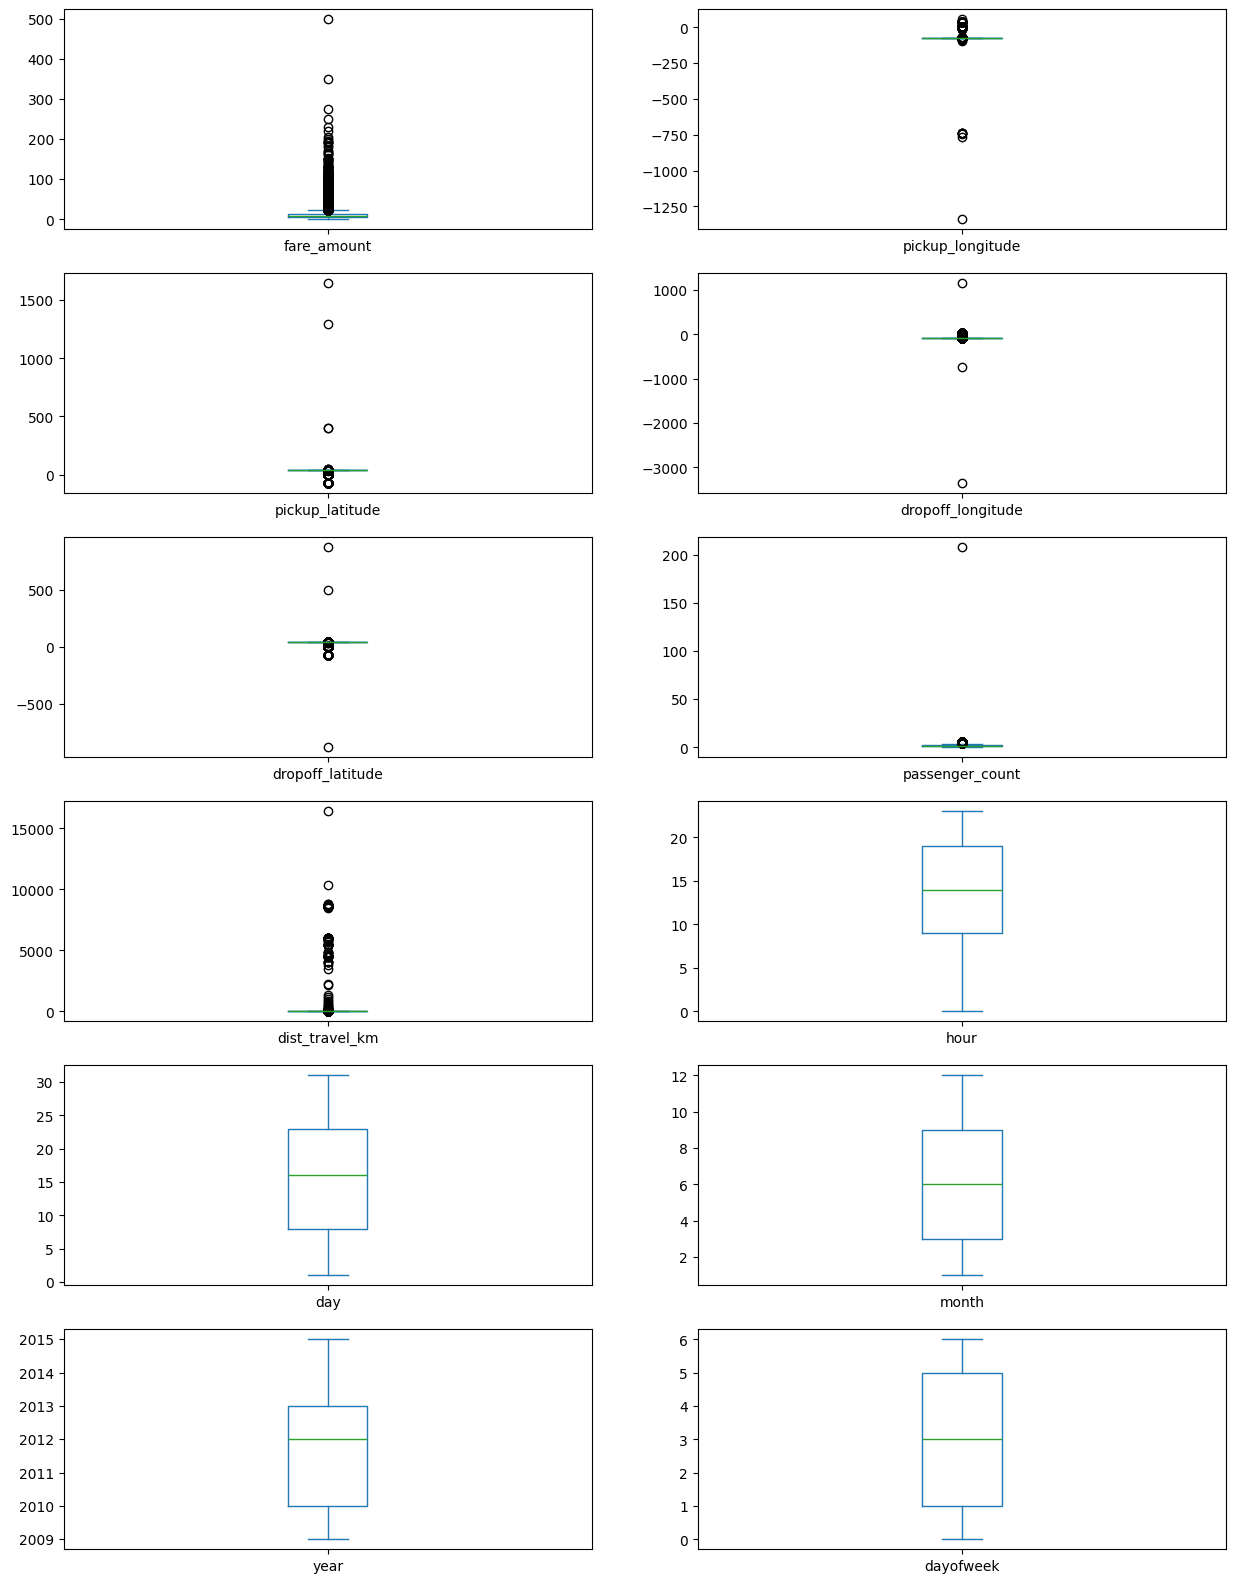

In [40]:
df.plot(kind = "box", subplots = True, layout = (6, 2), figsize = (15, 20))
plt.show()

# Remove Outliers

In [44]:
def remove_outlier(df1, col) : 
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df1[col], lower_bound, upper_bound)
    return df1

def treat_outliers(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df1, c)
    return df1

In [45]:
df = treat_outliers(df, df.iloc[:,0::])

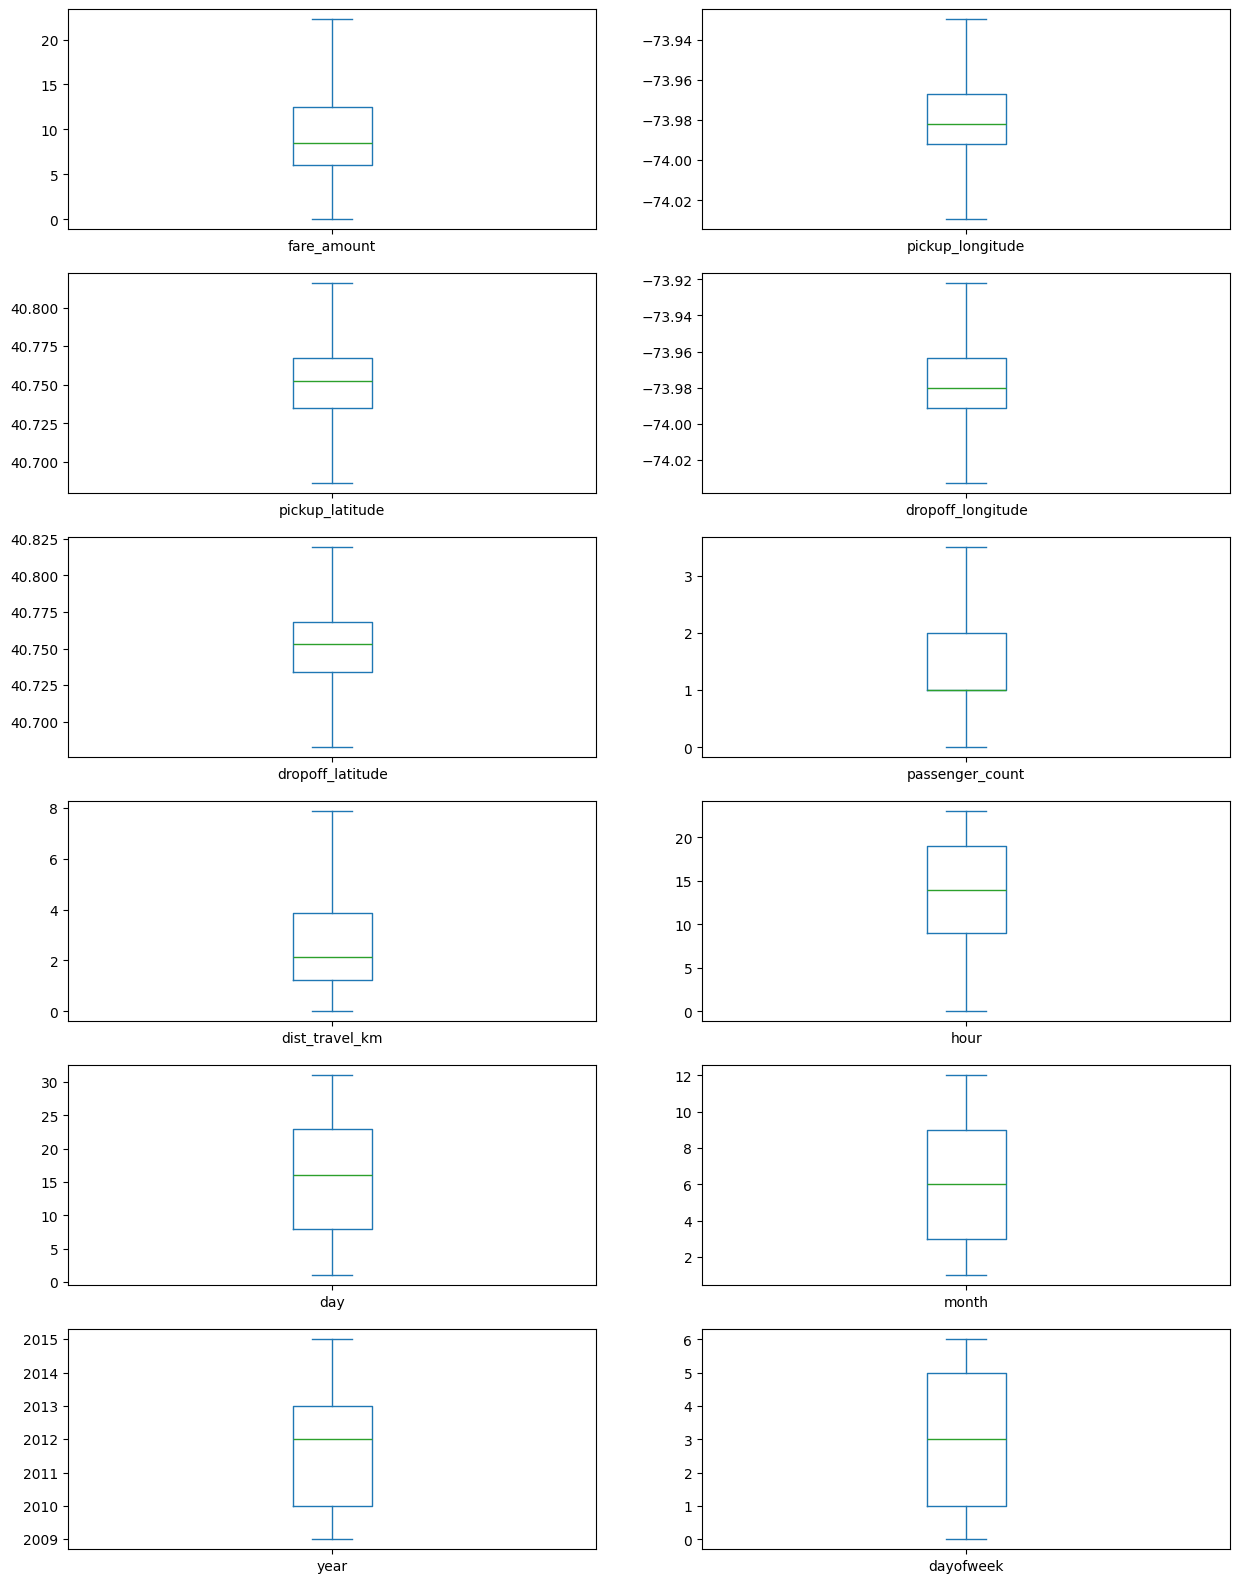

In [46]:
df.plot(kind = "box", subplots = True, layout = (6, 2), figsize = (15, 20))
plt.show()

In [47]:
corr = df.corr()

In [48]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km,hour,day,month,year,dayofweek
fare_amount,1.000000,0.154038,-0.110913,0.218605,-0.125969,0.015933,0.844561,-0.023626,0.004449,0.030562,0.141490,0.013626
pickup_longitude,0.154038,1.000000,0.259614,0.425556,0.073390,-0.013208,0.098006,0.011590,-0.003196,0.001168,0.010190,-0.024654
pickup_latitude,-0.110913,0.259614,1.000000,0.049069,0.515778,-0.012875,-0.046835,0.029680,-0.001540,0.001564,-0.014252,-0.042295
dropoff_longitude,0.218605,0.425556,0.049069,1.000000,0.245949,-0.009316,0.186461,-0.046532,-0.004016,0.002388,0.011347,-0.003355
dropoff_latitude,-0.125969,0.073390,0.515778,0.245949,1.000000,-0.006326,-0.038886,0.019768,-0.003499,-0.001186,-0.009594,-0.031929
passenger_count,0.015933,-0.013208,-0.012875,-0.009316,-0.006326,1.000000,0.009731,0.020260,0.002699,0.010353,-0.009743,0.048542
dist_travel_km,0.844561,0.098006,-0.046835,0.186461,-0.038886,0.009731,1.000000,-0.038347,0.003080,0.011631,0.024263,0.027066
hour,-0.023626,0.011590,0.029680,-0.046532,0.019768,0.020260,-0.038347,1.000000,0.004664,-0.003924,0.002162,-0.086956
day,0.004449,-0.003196,-0.001540,-0.004016,-0.003499,0.002699,0.003080,0.004664,1.000000,-0.017358,-0.012165,0.005609
month,0.030562,0.001168,0.001564,0.002388,-0.001186,0.010353,0.011631,-0.003924,-0.017358,1.000000,-0.115860,-0.008785


<Axes: >

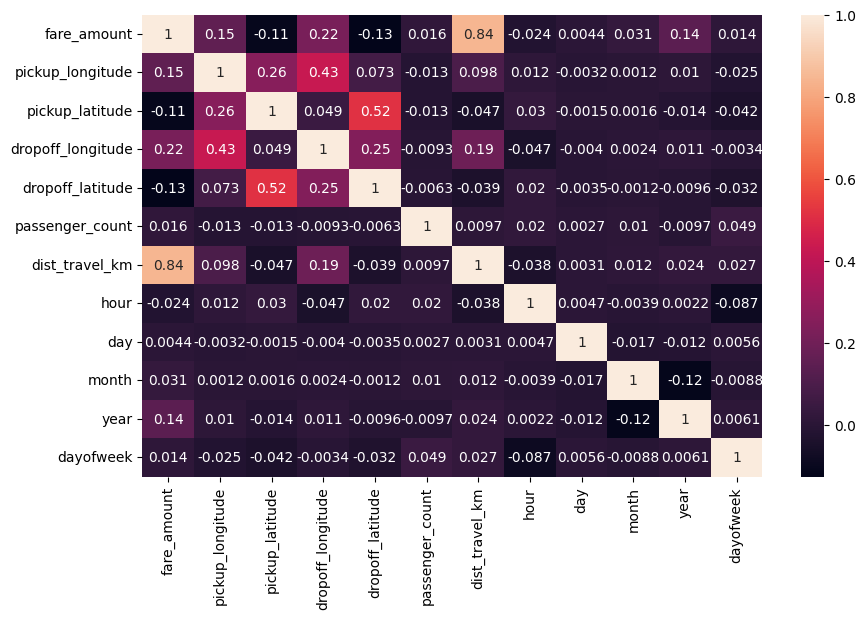

In [49]:
fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)

# Linear Regression & Random Forest

In [51]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'dist_travel_km', 'hour', 'day', 'month', 'year', 'dayofweek'],
      dtype='object')

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
df_x = df[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'dist_travel_km', 'hour', 'day', 'month', 'year', 'dayofweek']]

In [57]:
df_y = df['fare_amount']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 1)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()

In [62]:
model.fit(x_train, y_train)

LinearRegression()

In [63]:
y_pred_lin = model.predict(x_test)
print(y_pred_lin)

[ 9.33778694  6.59565699  7.269257   ... 10.61940161  3.518
 20.06832689]


# Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf = RandomForestRegressor (n_estimators= 100)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [66]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([ 9.2783,  5.575 ,  8.226 , ..., 11.18  ,  8.2705, 19.305 ])

# Comparitive Scores

In [67]:
cols = ['Model', 'RMSE', 'R-Squared']
result_tabulation = pd.DataFrame(columns = cols)

In [70]:
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
reg_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_lin))
reg_squared = r2_score(y_test, y_pred_lin)

In [72]:
full_metrics = pd.Series({'Model' : "Linear Regression", 'RMSE' : reg_RMSE, 'R-Squared' : reg_squared})

In [79]:
result_tabulation = result_tabulation._append(full_metrics, ignore_index = True)

/tmp/ipykernel_4636/44526370.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_tabulation = result_tabulation._append(full_metrics, ignore_index = True)


In [80]:
result_tabulation

,Model,RMSE,R-Squared
0,Linear Regression,2.727634,0.748838


In [81]:
rf_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_squared = r2_score(y_test, y_pred_rf)

In [82]:
full_metrics = pd.Series({'Model' : "Random Forest", 'RMSE' : rf_RMSE, 'R-Squared' : rf_squared})
result_tabulation = result_tabulation._append(full_metrics, ignore_index = True)

In [83]:
result_tabulation

,Model,RMSE,R-Squared
0,Linear Regression,2.727634,0.748838
1,Random Forest,2.380115,0.808760
